In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [14]:
# Downloading Dataset
!curl "https://raw.githubusercontent.com/RebuniTech/Sms_SPam-detection/main/sms_dataset.tsv" --output sms_dataset.tsv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 22  501k   22  112k    0     0   144k      0  0:00:03 --:--:--  0:00:03  145k
 72  501k   72  361k    0     0   203k      0  0:00:02  0:00:01  0:00:01  204k
 81  501k   81  409k    0     0   147k      0  0:00:03  0:00:02  0:00:01  147k
 88  501k   88  441k    0     0   116k      0  0:00:04  0:00:03  0:00:01  116k
 94  501k   94  473k    0     0    98k      0  0:00:05  0:00:04  0:00:01   98k
100  501k  100  501k    0     0  99429      0  0:00:05  0:00:05 --:--:-- 90871


In [15]:
df = pd.read_csv('sms_dataset.tsv', sep='\t')
print("Total Dataset:", len(df))

Total Dataset: 5572


In [16]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

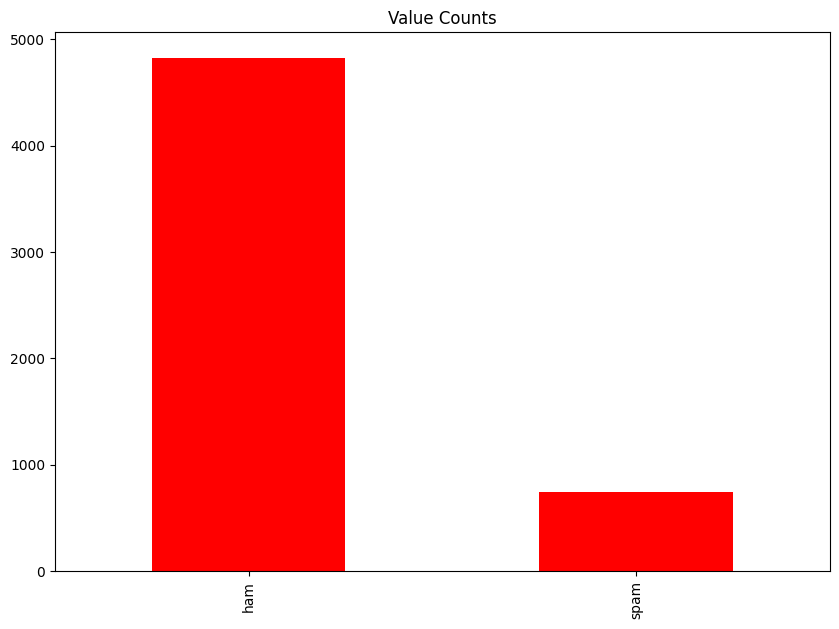

In [27]:
df.label.value_counts().plot(kind='bar', figsize=(10, 7),color='red')
plt.title('Value Counts')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [18]:
X = df.message # X_feature
y = df.label # y_label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

count_vectorizer = CountVectorizer()
tfidf_transformer = TfidfTransformer()

count_vectorizer.fit(X_train)
X_train_cv = count_vectorizer.transform(X_train)
tfidf_transformer.fit(X_train_cv)
X_train_tfidf = tfidf_transformer.transform(X_train_cv)

X_test_cv = count_vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_cv)

# Using Naive Bayes

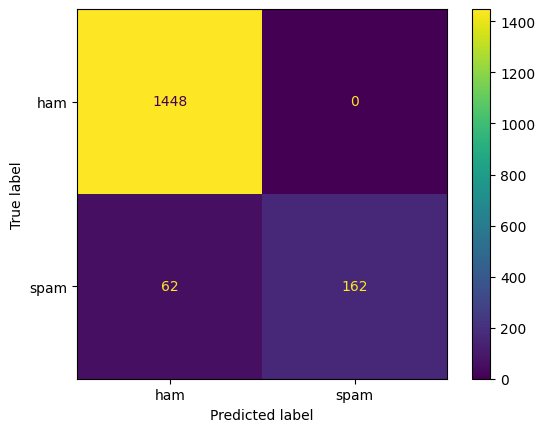

In [19]:
naiv_bayes = MultinomialNB()
naiv_bayes.fit(X_train_tfidf, y_train)

prediction = naiv_bayes.predict(X_test_tfidf)
ConfusionMatrixDisplay.from_estimator(naiv_bayes, X_test_tfidf, y_test)
plt.show()

In [20]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       1.00      0.72      0.84       224

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



# Using Decision Tree

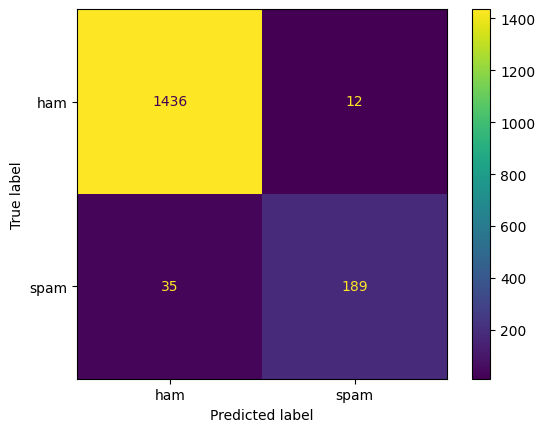

In [21]:
dt_cls = DecisionTreeClassifier()
dt_cls.fit(X_train_tfidf, y_train)
prediction = dt_cls.predict(X_test_tfidf)
ConfusionMatrixDisplay.from_estimator(dt_cls, X_test_tfidf, y_test)
plt.show()

In [22]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         ham       0.98      0.99      0.98      1448
        spam       0.94      0.84      0.89       224

    accuracy                           0.97      1672
   macro avg       0.96      0.92      0.94      1672
weighted avg       0.97      0.97      0.97      1672



# Using Linear SVC 

C:\Users\Ahtasham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


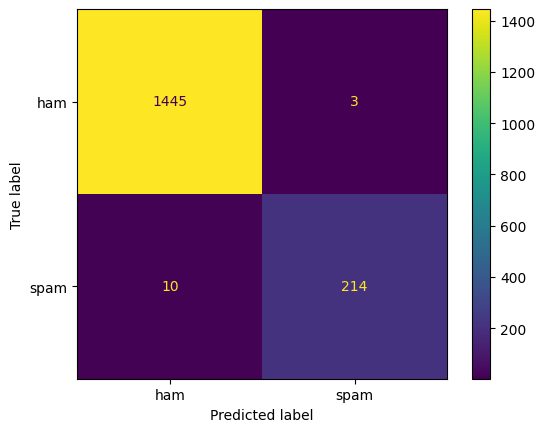

In [23]:
lsvc = LinearSVC()
svc = lsvc.fit(X_train_tfidf, y_train)
prediction = lsvc.predict(X_test_tfidf)
ConfusionMatrixDisplay.from_estimator(lsvc, X_test_tfidf, y_test)
plt.show()

In [24]:
print(classification_report(y_test, prediction))
print("Accurancy: ", accuracy_score(y_test, prediction))

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00      1448
        spam       0.99      0.96      0.97       224

    accuracy                           0.99      1672
   macro avg       0.99      0.98      0.98      1672
weighted avg       0.99      0.99      0.99      1672

Accurancy:  0.9922248803827751
